<a href="https://colab.research.google.com/github/Kovidk/Supervised-ML-Regression-Yes-Bank-Stock-Closing-Price-Prediction/blob/main/ML_Regression_Yes_Bank_Stock_Closing_Price_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Yes Bank Stock Price Prediction



##### **Project Type**    - EDA/Regression//Supervised
##### **Contribution**    - Individual
#####Team Member 1 - Kovid Krishnan
#####Team Member 2 -
#####Team Member 3 -
#####Team Member 4 -


# **Project Summary -**

Write the summary here within 500-600 words.

A well-known bank in the Indian financial industry is Yes Bank. The Rana Kapoor fraud case has been in the headlines since 2018 as a result of it. Due to this, it was interesting to observe how it affected the company's stock prices and whether Time series models or other prediction models could properly reflect for such circumstances. Since the bank's foundation, this dataset has included closing, starting, highest, and lowest stock values for each month. The main objective is to predict the stock's closing price of the month.

To make our ideas work and gain insights, we need to understand our data well. I've got a clear view of our problem and goal, but there are a few steps left to predict the stock's closing price for a month. I'll do this by using Regression Analysis and building a better model that can quickly and accurately predict what we want.

Feature Engineering:- Introducing New Variables, Dummy Variables

Univariate Analysis:- Distplot, Histogram, Barplot

Bivariate Analysis:- Boxplot, Heatmap

Introduced Models:- Linear Regression, Lasso, Ridge and decision tree Regression

In our dataset, we've got 185 rows and 5 columns. We focus on two main types of numbers:

Dependent Variable (Close): This is like the last price tag of the month's shopping, and we want to predict it.
Independent Variables (Open, High, Low): These are like the starting, highest, and lowest prices during the month.

Date: Date of record

Open: Opening Price of the day

High: Highest Price in the day

Low: Lowest Price in the day

Close: Closing Price of the day

# **GitHub Link -**

Provide your GitHub Link here. https://github.com/Kovidk/ML-Regression---Yes-Bank-Stock-Closing-Price-Prediction

# **Problem Statement**


**Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime

# This technique is used to divide the dataset into a training set and a test set when building the model.
from sklearn.model_selection import train_test_split

#Import libraries for Regressor
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

# Import the matrix module to evaluate the model's performance.
from sklearn.metrics import *
import pandas.util.testing as tm

# Import the variance inflation factor technique to reduce multicollinearity in independent variables.
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings('ignore')


<ipython-input-2-c5ed8b8587cb>:31: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
price_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Cohort London/Project/data_YesBank_StockPrices.csv")

### Dataset First View

In [5]:
# Dataset First Look
price_df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
price_df.shape

(185, 5)

### Dataset Information

In [7]:
# Dataset Info
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
len(price_df[price_df.duplicated()])

0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
price_df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
price_df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
# Dataset Describe
price_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,185.0,105.541405,98.879850,10.00,33.80,62.98,153.00,369.95
High,185.0,116.104324,106.333497,11.24,36.14,72.55,169.19,404.00
Low,185.0,94.947838,91.219415,5.55,28.51,58.00,138.35,345.50
Close,185.0,105.204703,98.583153,9.98,33.45,62.54,153.30,367.90


### Variables Description

Date :- It denotes the month and year for a specific pricing.

Open :- The price at which a stock started trading that month is referred to as the "Open."

High :- The highest price for that particular month.

Low :- It describes the monthly minimum price.

Close :- It refers to the final trading price for that month, which we have to predict using regression.

## 3. ***Data Wrangling***

### Data Wrangling Code

In [12]:
# Write your code to make your dataset analysis ready.

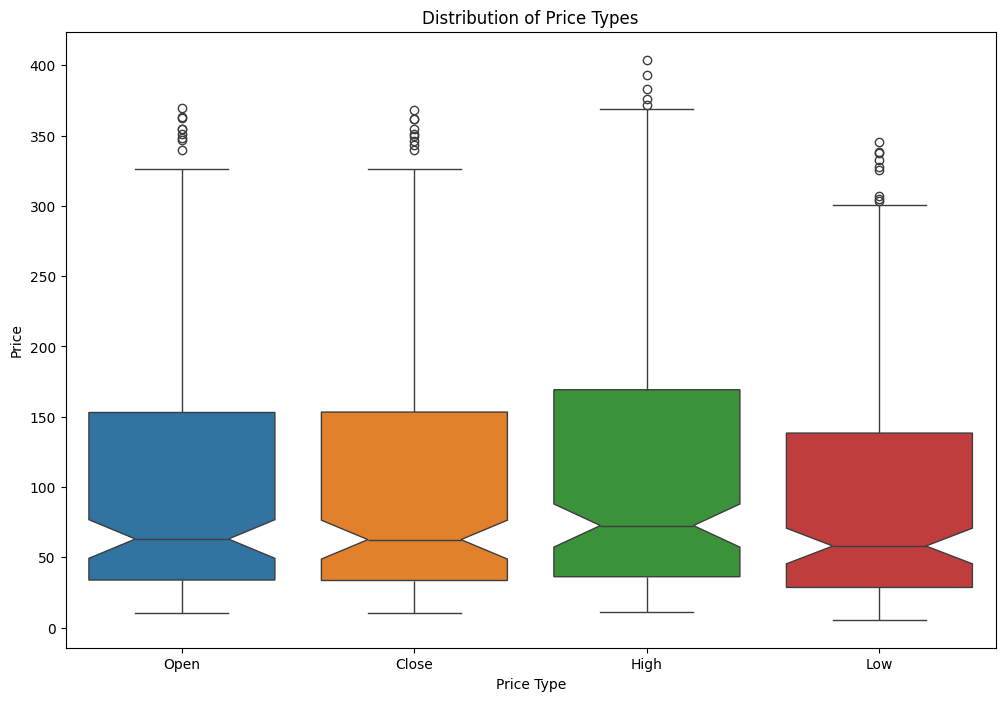

In [13]:
# Check for Outliers

# Set the figure size
plt.figure(figsize=(12, 8))

# Create a boxplot using Seaborn
sns.boxplot(data=price_df[['Open', 'Close', 'High', 'Low']], notch=True)

# Add labels and title
plt.xlabel('Price Type')
plt.ylabel('Price')
plt.title('Distribution of Price Types')

# Show the plot
plt.show()

In [14]:
# Convert 'Date' column to datetime format using pd.to_datetime()
price_df['Date'] = pd.to_datetime(price_df['Date'], format='%b-%y')

# Display information about the DataFrame
price_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


### What all manipulations have you done and insights you found?

Answer Here.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

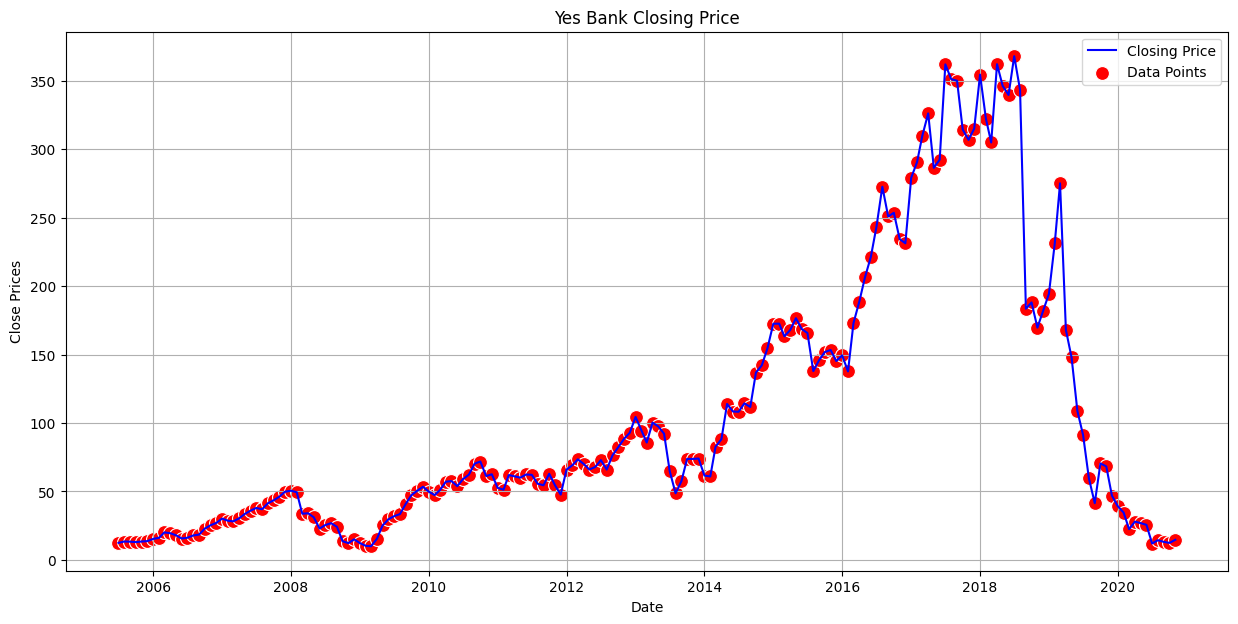

In [15]:
# Chart - 1 visualization code

# Set the figure size
plt.figure(figsize=(15, 7))

# Plotting closing prices using Seaborn's lineplot
sns.lineplot(data=price_df, x="Date", y="Close", color='blue', label='Closing Price')

# Adding scatterplot markers
sns.scatterplot(data=price_df, x="Date", y="Close", s=100, color='red', label='Data Points')

# Adding grid, labels, and title
plt.grid(True)
plt.xlabel('Date', fontsize=10)
plt.ylabel('Close Prices', fontsize=10)
plt.title('Yes Bank Closing Price')

# Display the legend
plt.legend()

# Show the plot
plt.show()

#### Chart - 2

###Dependent Variable - Close

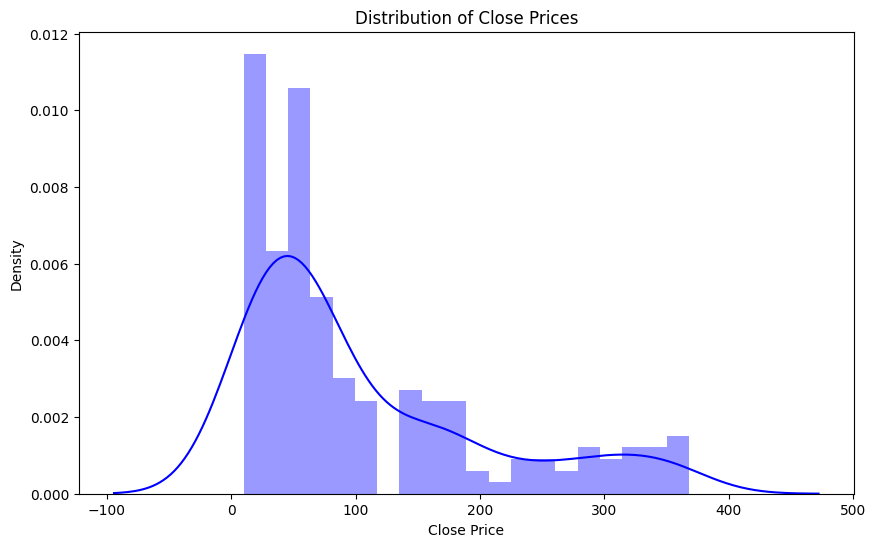

In [16]:
# Chart - 2 visualization code

#distribution of close price stock

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a distribution plot using Seaborn
sns.distplot(price_df["Close"], color="blue", bins=20)

# Add title and labels
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Density')

# Show the plot
plt.show()


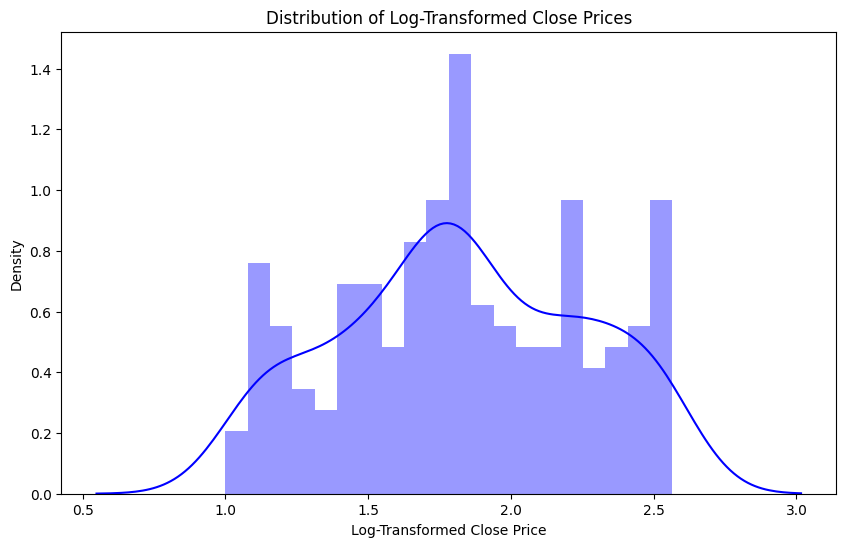

In [17]:
# Using Log Transformation to make it a normal distribution of the close price

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a distribution plot of the log-transformed "Close" prices using Seaborn
sns.distplot(np.log10(price_df["Close"]), color="blue", bins=20)

# Add title and labels
plt.title('Distribution of Log-Transformed Close Prices')
plt.xlabel('Log-Transformed Close Price')
plt.ylabel('Density')

# Show the plot
plt.show()

###Independent Variable - Open, High, Low

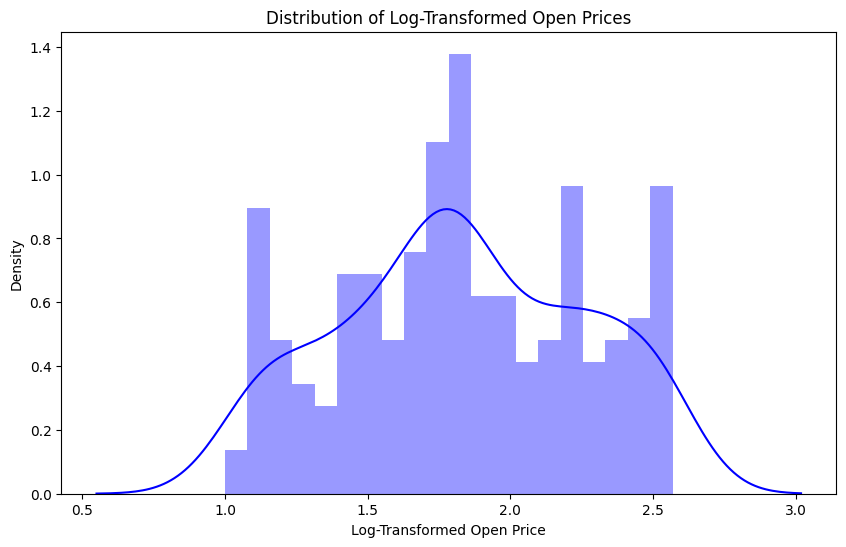

In [18]:
# Using Log Transformation to make it a normal distribution of the Open price

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a distribution plot of the log-transformed "Open" prices using Seaborn
sns.distplot(np.log10(price_df["Open"]), color="blue", bins=20)

# Add title and labels
plt.title('Distribution of Log-Transformed Open Prices')
plt.xlabel('Log-Transformed Open Price')
plt.ylabel('Density')

# Show the plot
plt.show()


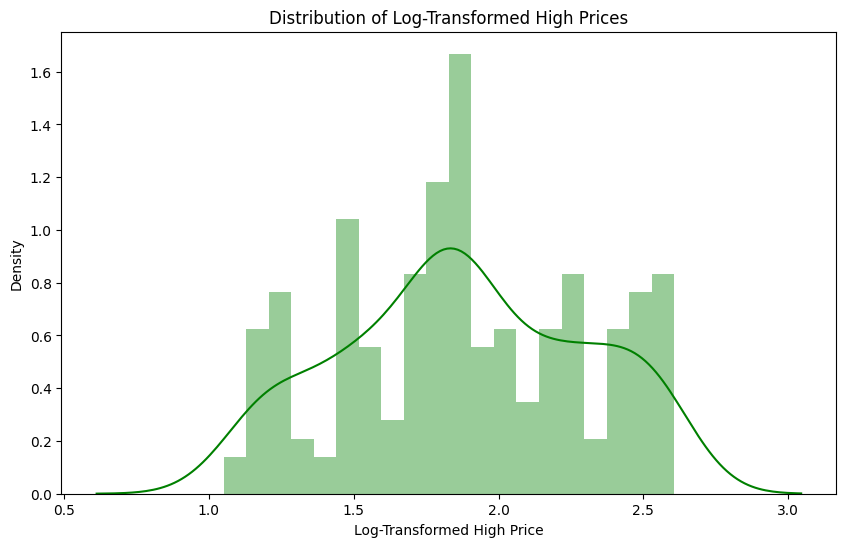

In [19]:
# Using Log Transformation to make it a normal distribution of the High price

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a distribution plot of the log-transformed "High" prices using Seaborn
sns.distplot(np.log10(price_df["High"]), color="green", bins=20)

# Add title and labels
plt.title('Distribution of Log-Transformed High Prices')
plt.xlabel('Log-Transformed High Price')
plt.ylabel('Density')

# Show the plot
plt.show()


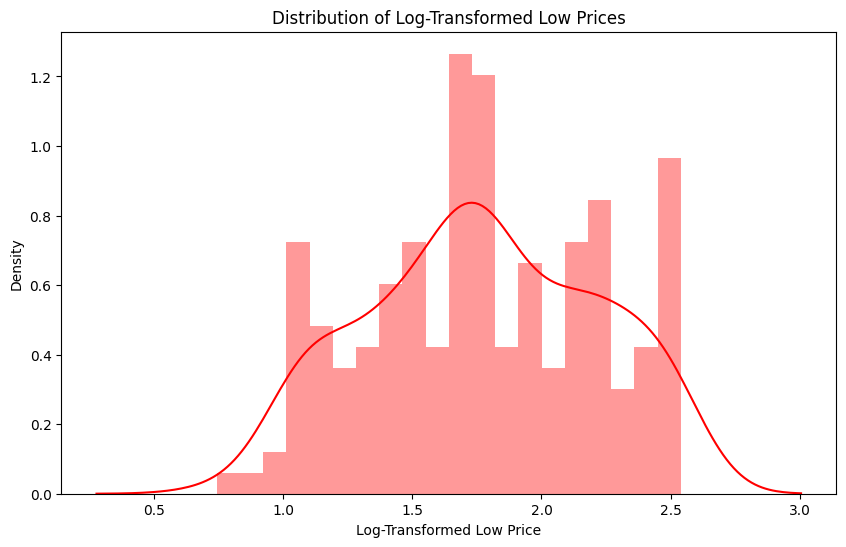

In [20]:
# Using Log Transformation to make it a normal distribution of the Low price

# Set the figure size
plt.figure(figsize=(10, 6))

# Create a distribution plot of the log-transformed "Low" prices using Seaborn
sns.distplot(np.log10(price_df["Low"]), color="Red", bins=20)

# Add title and labels
plt.title('Distribution of Log-Transformed Low Prices')
plt.xlabel('Log-Transformed Low Price')
plt.ylabel('Density')

# Show the plot
plt.show()


#### Chart - 3

### Relationship between Dependent and Independent Variable

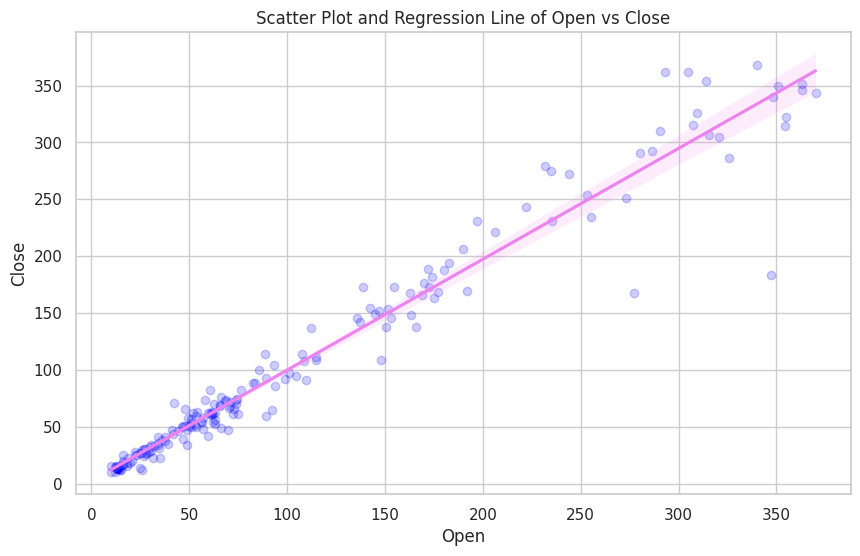

In [21]:
# Chart - 3 visualization code

# finding relationship between dependent variable - Close and Independent Variable - Open

# Create a scatter plot and regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(data=price_df, x='Open', y='Close', alpha=0.2, color = 'blue')
sns.regplot(data=price_df, x='Open', y='Close', scatter = False, color='violet')

# Set labels and title
plt.xlabel('Open')
plt.ylabel('Close')
plt.title('Scatter Plot and Regression Line of Open vs Close')

# Show the plot
plt.show()


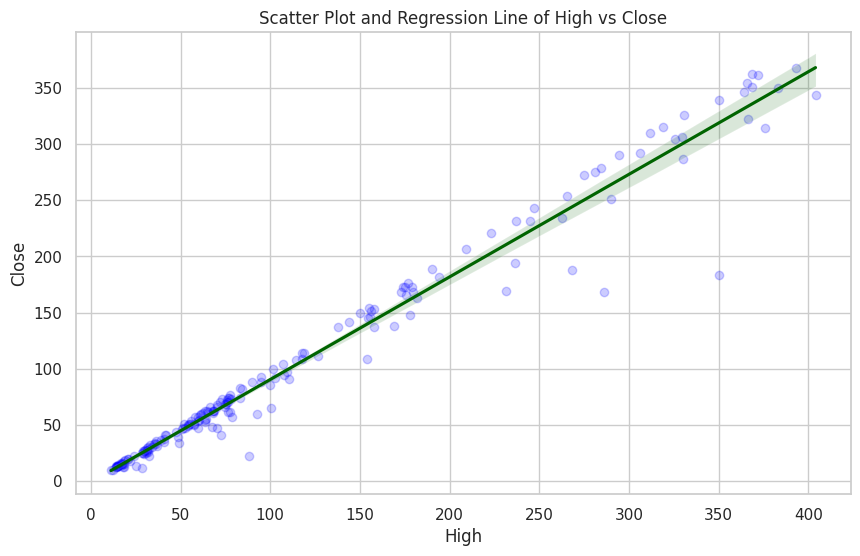

In [22]:
# finding relationship between dependent variable - Close and Independent Variable - High

# Create a scatter plot and regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(data=price_df, x='High', y='Close', alpha=0.2, color = 'blue')
sns.regplot(data=price_df, x='High', y='Close', scatter = False, color='darkgreen')

# Set labels and title
plt.xlabel('High')
plt.ylabel('Close')
plt.title('Scatter Plot and Regression Line of High vs Close')

# Show the plot
plt.show()


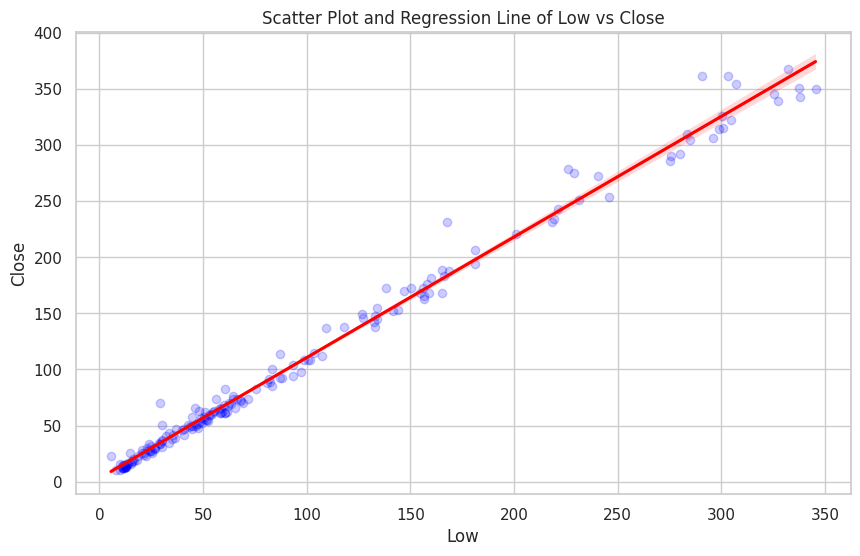

In [23]:
# finding relationship between dependent variable - Low and Independent Variable - Close

# Create a scatter plot and regression line
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
plt.scatter(data=price_df, x='Low', y='Close', alpha=0.2, color = 'blue')
sns.regplot(data=price_df, x='Low', y='Close', scatter = False, color='Red')

# Set labels and title
plt.xlabel('Low')
plt.ylabel('Close')
plt.title('Scatter Plot and Regression Line of Low vs Close')

# Show the plot
plt.show()

#### Chart - 4

Correlation Heatmap

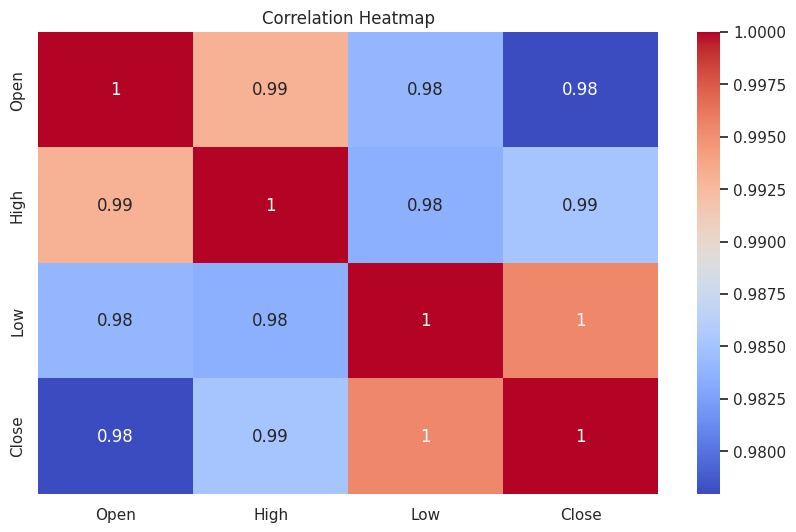

In [24]:
# Chart - 4 visualization code

# Set the figure size
plt.figure(figsize=(10, 6))

# Calculate the correlation matrix
correlation = price_df.corr()

# Create a heatmap with customized settings
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()

#### Chart - 5

###Pair Plot

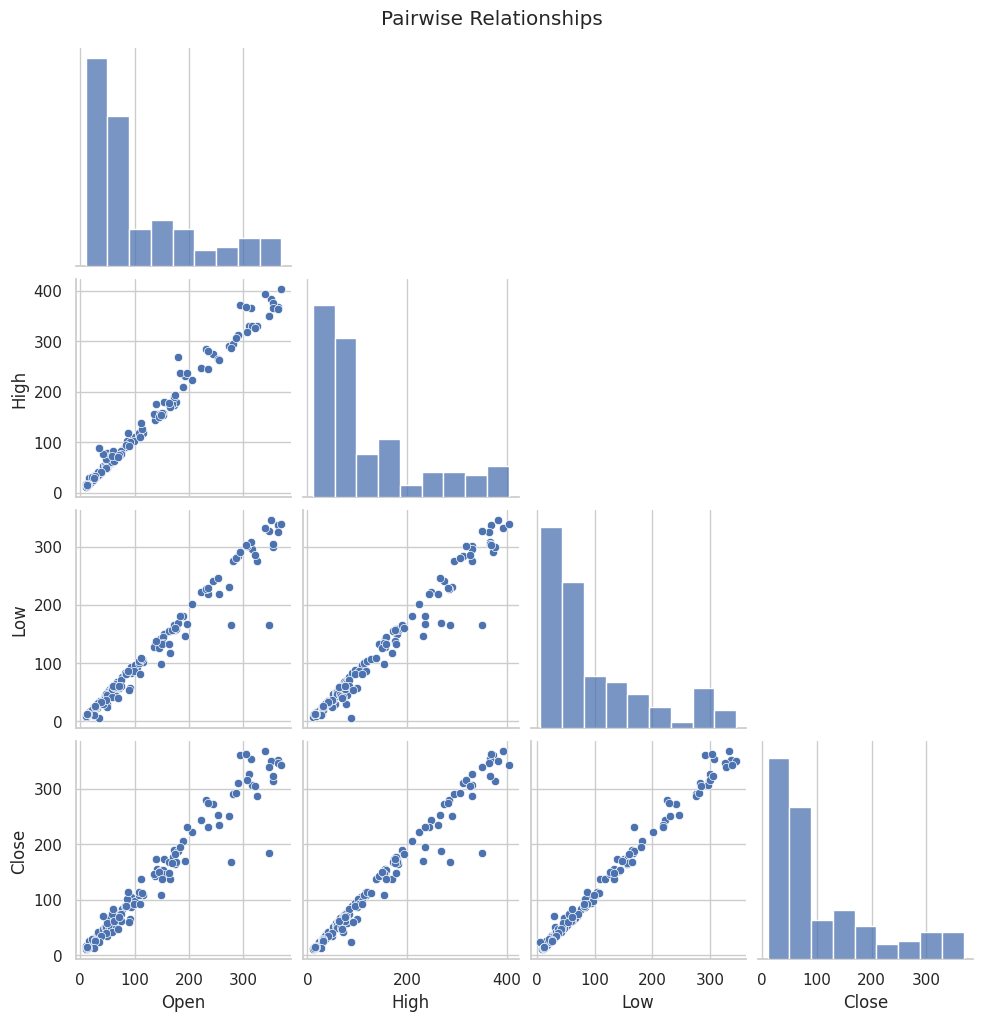

In [25]:
# Chart - 5 visualization code

# Using pair plot to analyse relationship between variables

# Create a pair plot
pair_plot = sns.pairplot(price_df, kind="scatter", diag_kind="hist", corner=True, markers='o', palette='coolwarm')

# Customize titles and labels
pair_plot.fig.suptitle("Pairwise Relationships", y=1.02)

# Show the plot
plt.show()


### Chart - 6

###Multicollinearity

Calculate the variation inflation factor (VIF), To determine the correlation between independent variables.

In [26]:
column_to_exclude = ["Date", "Close"]
independent_variables = [col for col in price_df.columns if col not in column_to_exclude]
dependent_variable = ["Close"]

# Select independent variables
X = price_df[independent_variables]

# Calculate VIF for each variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

  Variable         VIF
0     Open  175.185704
1     High  167.057523
2      Low   71.574137




*   Even though some VIF ratings are high, we've decided not to change the features as each feature is really important for our predictions, just like how real-world indicators use them to guess future values.

*  We're not getting rid of any columns because every single one is super important for predictions. We'll see how well the model works, even with the features kind of overlapping.

## ***6. Feature Engineering & Data Pre-processing***

### Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [27]:
# Creating arrays of our input variable and label to feed the data to the model.
# Create the data of independent variables
x = np.log10(price_df[independent_variables]).values            # applying log transform on our independent variables.

# Create the dependent variable data
y = np.log10(price_df[dependent_variable]).values               # applying log transform on our dependent variable.

### Data Splitting

In [28]:
# Split our data into train and test datasets
# Train and Test Set data splited into 70-30

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state= 1)

In [29]:
x_train.shape

(129, 3)

In [30]:
x_test.shape

(56, 3)

### Data Scaling

In [31]:
# Scaling the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

### 7. Dimesionality Reduction

In [32]:
# Split your data to train and test. Choose Splitting ratio wisely.
# Split our data into train and test datasets
# Train and Test Set data splited into 70-30

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3,random_state= 1)

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [33]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### We will Create 4 Regression Models for our Data. 1} Linear Regression 2} Lasso Regression 3} Ridge Regression 4} Decision Tree Regression

### ML Model - 1
### Linear Regression

In [34]:
# ML Model - 1 Implementation of Linear Regression

# Initializing the model.
model_lr = LinearRegression()

# Fitting the model on our train data.
model_lr.fit(x_train, y_train)

LinearRegression()

In [35]:
# Predicting on our test data.
y_pred_linear = model_lr.predict(x_test)
y_pred_linear[:10]

array([[1.41677983],
       [1.46520369],
       [1.72263313],
       [1.15021849],
       [2.17936417],
       [2.52152451],
       [1.69541413],
       [1.4323878 ],
       [1.40161556],
       [1.70671062]])

In [36]:
# Checking the model parameters. printing the intercept.
model_lr.intercept_


array([-0.01225461])

In [37]:
# printing the model coefficients.
model_lr.coef_

array([[-0.5845125 ,  0.88969056,  0.69813584]])

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [38]:
# Visualizing evaluation Metric Score chart

MAE_linear = round(mean_absolute_error(10**(y_test),(10**y_pred_linear)),4)
print(f"Mean Absolute Error : {MAE_linear}")

MSE_linear = round(mean_squared_error((10**y_test),10**(y_pred_linear)),4)
print(f"Mean squared Error : {MSE_linear}")

RMSE_linear = round(np.sqrt(MSE_linear),4)
print(f"Root Mean squared Error : {RMSE_linear}")

R2_linear = round(r2_score(10**(y_test), 10**(y_pred_linear)),4)
print(f"R2 score : {R2_linear}")

Adjusted_R2_linear = round(1-(1-r2_score(10**y_test,10**y_pred_linear))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),3)
print(f"Adjusted R2 score : {Adjusted_R2_linear}")


Mean Absolute Error : 4.4625
Mean squared Error : 82.0397
Root Mean squared Error : 9.0576
R2 score : 0.9904
Adjusted R2 score : 0.99


In [39]:
# storing our performance data for this model so that we can compare them with other models. Let's store them in a dict for now.
linear_regessor_list = {'Mean Absolute Error' : MAE_linear,'Mean squared Error' : MSE_linear,
                   'Root Mean squared Error' : RMSE_linear,'R2 score' : R2_linear,'Adjusted R2 score' : Adjusted_R2_linear }

# converting above dict into a dataframe
metric_df = pd.DataFrame.from_dict(linear_regessor_list, orient='index').reset_index()

# renaming the columns.
metric_df = metric_df.rename(columns={'index':'Metric',0:'Linear Regression'})
metric_df

,Metric,Linear Regression
0,Mean Absolute Error,4.4625
1,Mean squared Error,82.0397
2,Root Mean squared Error,9.0576
3,R2 score,0.9904
4,Adjusted R2 score,0.9900


Text(0, 0.5, 'Predicted test value')

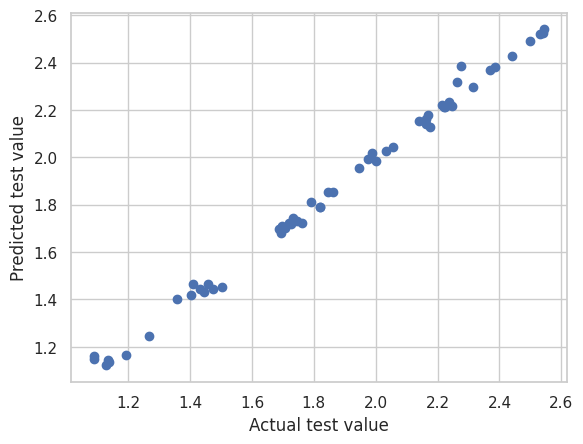

In [40]:
# Sctter Plot of Actual vs Predicted Values
plt.scatter(y_test,y_pred_linear)
plt.xlabel('Actual test value')
plt.ylabel('Predicted test value')

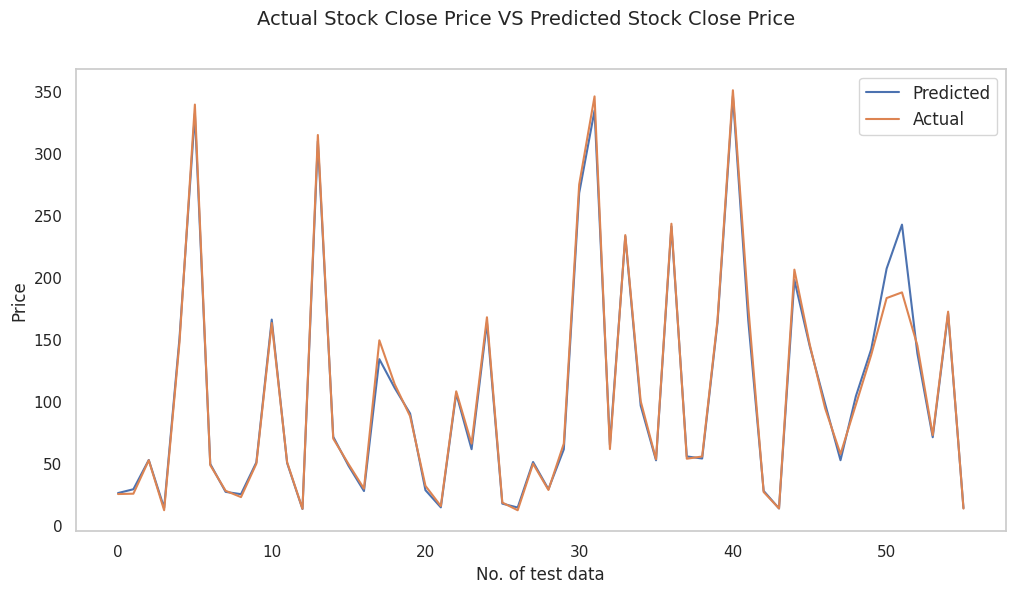

In [41]:
# Actual Price vs Prediction price for Linear Regression plot:

plt.figure(figsize=(12,6))
plt.plot(10**(y_pred_linear))
plt.plot(10**(np.array(y_test)))
plt.xlabel("No. of test data",fontsize= 12)
plt.ylabel("Price",fontsize= 12)
plt.suptitle("Actual Stock Close Price VS Predicted Stock Close Price",fontsize=14)
plt.legend(["Predicted","Actual"],fontsize= 12)
plt.grid()
plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [42]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

#### Note: For basic linear regression (without regularization), there are no hyperparameters to tune like there are for Ridge or Lasso regression.

### ML Model - 2

#### 1. Lasso Regression

In [43]:
# Initializing the model with some base values.
lasso  = Lasso(alpha=0.0001 , max_iter= 3000)
# Fitting the model on our training data.
lasso.fit(x_train, y_train)

Lasso(alpha=0.0001, max_iter=3000)

In [44]:
# Printing the intercept and coefficients.
lasso.intercept_

array([-0.00557997])

In [45]:
lasso.coef_

array([-0.45783988,  0.80080188,  0.65812323])

#### 2. Cross- Validation & Hyperparameter Tuning

In [46]:
# Cross validation. optimizing our model by finding the best value of our hyperparameter.
from sklearn.model_selection import GridSearchCV

lasso_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.005,0.006,0.007,0.01,0.015,0.02,1e-1,1,5,10,20,30,40,45,50]}  # list of parameters.

lasso_regressor = GridSearchCV(lasso, lasso_param_grid, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=Lasso(alpha=0.0001, max_iter=3000),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.005, 0.006, 0.007, 0.01, 0.015,
                                   0.02, 0.1, 1, 5, 10, 20, 30, 40, 45, 50]},
             scoring='neg_mean_squared_error')

In [47]:
# getting the best parameter
lasso_regressor.best_params_          # after several iterations and trials, we get this value as best parameter

{'alpha': 1e-05}

In [48]:
# getting the best score
lasso_regressor.best_score_

-0.0010909879559484231

In [49]:
# Predicting on the test dataset.
y_pred_lasso = lasso_regressor.predict(x_test)
print(y_pred_lasso)

[1.41637837 1.46514383 1.72331634 1.1503921  2.17957205 2.52171802
 1.69634945 1.43168557 1.40242165 1.70697616 2.22057616 1.70251471
 1.12146883 2.49144503 1.85480396 1.68173166 1.4429088  2.12792278
 2.04402421 1.95554646 1.45389384 1.16429919 2.02748607 1.7878206
 2.21399221 1.2450342  1.15983223 1.70885739 1.46624832 1.78872899
 2.42794466 2.52513523 1.81370394 2.36807333 1.98511387 1.72034187
 2.38226698 1.74579721 1.73290854 2.21454296 2.53994084 2.21866211
 1.44478043 1.13679937 2.29676266 2.15986599 1.99203679 1.72162584
 2.01805645 2.15324071 2.31781096 2.38378216 2.1430297  1.85225913
 2.23259107 1.14754212]


In [50]:
# checking the performance using evaluation metrics.
MAE_lasso = round(mean_absolute_error(10**(y_test),10**(y_pred_lasso)),4)
print(f"Mean Absolute Error : {MAE_lasso}")

MSE_lasso  = round(mean_squared_error(10**(y_test),10**(y_pred_lasso)),4)
print("Mean squared Error :" , MSE_lasso)

RMSE_lasso = round(np.sqrt(MSE_lasso),4)
print("Root Mean squared Error :" ,RMSE_lasso)

R2_lasso = round(r2_score(10**(y_test), 10**(y_pred_lasso)),4)
print("R2 score :" ,R2_lasso)

Adjusted_R2_lasso = round(1-(1-r2_score(10**y_test, 10**y_pred_lasso))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_lasso)

Mean Absolute Error : 4.4716
Mean squared Error : 81.1455
Root Mean squared Error : 9.0081
R2 score : 0.9905
Adjusted R2 score:  0.9899


In [51]:
# Now saving these metrics to our metrics dataframe. First we save them in a list and then we pass them to the df.
metric_df['Lasso'] = [MAE_lasso, MSE_lasso, RMSE_lasso, R2_lasso, Adjusted_R2_lasso]

### ML Model - 3

Ridge Regression with cross validated regularization.

In [52]:
# ML Model - 3 Implementation

# importing ridge regressor model.
from sklearn.linear_model import Ridge
ridge = Ridge()         # iitializing the model

# initiating the parameter grid for alpha (regularization strength).
ridge_param_grid = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,0.3,0.7,1,1.2,1.33,1.365,1.37,1.375,1.4,1.5,1.6,1.8,2.5,5,10,20,30,40,45,50,55,60,100]}

# cross validation.
ridge_regressor = GridSearchCV(ridge, ridge_param_grid, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 0.3, 0.7, 1, 1.2, 1.33, 1.365, 1.37,
                                   1.375, 1.4, 1.5, 1.6, 1.8, 2.5, 5, 10, 20,
                                   30, 40, 45, 50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [53]:
# finding the best parameter value (for alpha)
ridge_regressor.best_params_

{'alpha': 0.001}

In [54]:
# getting the best score for optimal value of alpha.
ridge_regressor.best_score_

-0.0011397343345388707

In [55]:
# predicting on the test dataset now.
y_pred_ridge = ridge_regressor.predict(x_test)

In [56]:
# evaluating performance.
MAE_ridge = round(mean_absolute_error(10**(y_test),10**(y_pred_ridge)),4)
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = round(mean_squared_error(10**(y_test),10**(y_pred_ridge)),4)
print("Mean squared Error :" , MSE_ridge)

RMSE_ridge = round(np.sqrt(MSE_ridge),4)
print("Root Mean squared Error :" ,RMSE_ridge)

R2_ridge = round(r2_score(10**(y_test), 10**(y_pred_ridge)),4)
print("R2 score :" ,R2_ridge)

Adjusted_R2_ridge = round(1-(1-r2_score(10**y_test, 10**y_pred_ridge))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_ridge)

Mean Absolute Error : 4.4665
Mean squared Error : 81.5425
Root Mean squared Error : 9.0301
R2 score : 0.9904
Adjusted R2 score:  0.9899


In [57]:
# storing these values in a list and appending to our metric df.
ridge_regressor_list = [MAE_ridge,MSE_ridge,RMSE_ridge,R2_ridge,Adjusted_R2_ridge]
metric_df['Ridge'] = ridge_regressor_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Ridge regression')

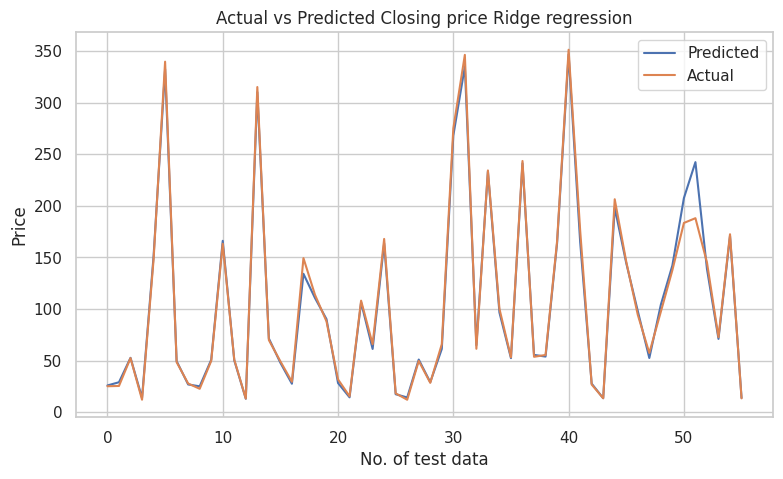

In [58]:
# Plotting predicted and actual target variable values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_ridge)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel("No. of test data")
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Ridge regression")

#### 2. Cross- Validation & Hyperparameter Tuning

In [59]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)


### ML Model - 4

Elastic-Net Regression with cross validation

In [60]:
# importing and initializing Elastic-Net Regression.
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

# initializing parameter grid.
elastic_net_param_grid = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,0.001,0.01,0.02,0.03,0.04,1,5,10,20,40,50,60,100],
                          'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]}

# cross-validation.
elasticnet_regressor = GridSearchCV(elasticnet, elastic_net_param_grid, scoring='neg_mean_squared_error',cv=5)
elasticnet_regressor.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=ElasticNet(alpha=0.1),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.001, 0.01, 0.02, 0.03, 0.04, 1, 5,
                                   10, 20, 40, 50, 60, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             scoring='neg_mean_squared_error')

In [61]:
# finding the best parameter
elasticnet_regressor.best_params_

{'alpha': 1e-05, 'l1_ratio': 0.1}

In [62]:
# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

-0.0010906628821462008

In [63]:
# making the predictions.
y_pred_elastic_net = elasticnet_regressor.predict(x_test)

In [64]:
MAE_elastic_net = round(mean_absolute_error(10**(y_test),10**(y_pred_elastic_net)),4)
print(f"Mean Absolute Error : {MAE_elastic_net}")

MSE_elastic_net  = round(mean_squared_error(10**(y_test),10**(y_pred_elastic_net)),4)
print("Mean squared Error :" , MSE_elastic_net)

RMSE_elastic_net = round(np.sqrt(MSE_elastic_net),4)
print("Root Mean squared Error :" ,RMSE_elastic_net)

R2_elastic_net = round(r2_score(10**(y_test), (10**y_pred_elastic_net)),4)
print("R2 score :" ,R2_elastic_net)

Adjusted_R2_elastic_net = round(1-(1-r2_score(10**y_test, 10**y_pred_elastic_net))*((x_test.shape[0]-1)/(x_test.shape[0]-x_test.shape[1]-1)),4)
print("Adjusted R2 score: ", Adjusted_R2_elastic_net)

Mean Absolute Error : 4.4681
Mean squared Error : 81.3762
Root Mean squared Error : 9.0209
R2 score : 0.9904
Adjusted R2 score:  0.9899


In [65]:

# storing these metrics in our dataframe.
elastic_net_metric_list = [MAE_elastic_net,MSE_elastic_net,RMSE_elastic_net,R2_elastic_net,Adjusted_R2_elastic_net]
metric_df['Elastic Net'] = elastic_net_metric_list

Text(0.5, 1.0, 'Actual vs Predicted Closing price Elastic Net regression')

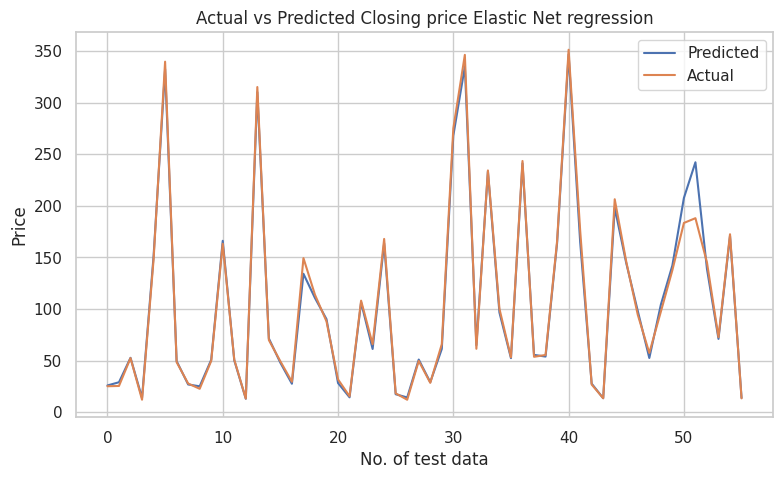

In [66]:

# Now let us plot the actual and predicted target variables values.
plt.figure(figsize=(9,5))
plt.plot(10**y_pred_elastic_net)
plt.plot(np.array(10**y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel("No. of test data")
plt.ylabel("Price")
plt.title("Actual vs Predicted Closing price Elastic Net regression")

In [67]:
# comparing the performance of all models that we have implemented.
metric_df

,Metric,Linear Regression,Lasso,Ridge,Elastic Net
0,Mean Absolute Error,4.4625,4.4716,4.4665,4.4681
1,Mean squared Error,82.0397,81.1455,81.5425,81.3762
2,Root Mean squared Error,9.0576,9.0081,9.0301,9.0209
3,R2 score,0.9904,0.9905,0.9904,0.9904
4,Adjusted R2 score,0.9900,0.9899,0.9899,0.9899


From above data, we can clearly see that the best performing model is Elastic Net as it scores the best in every single metric.

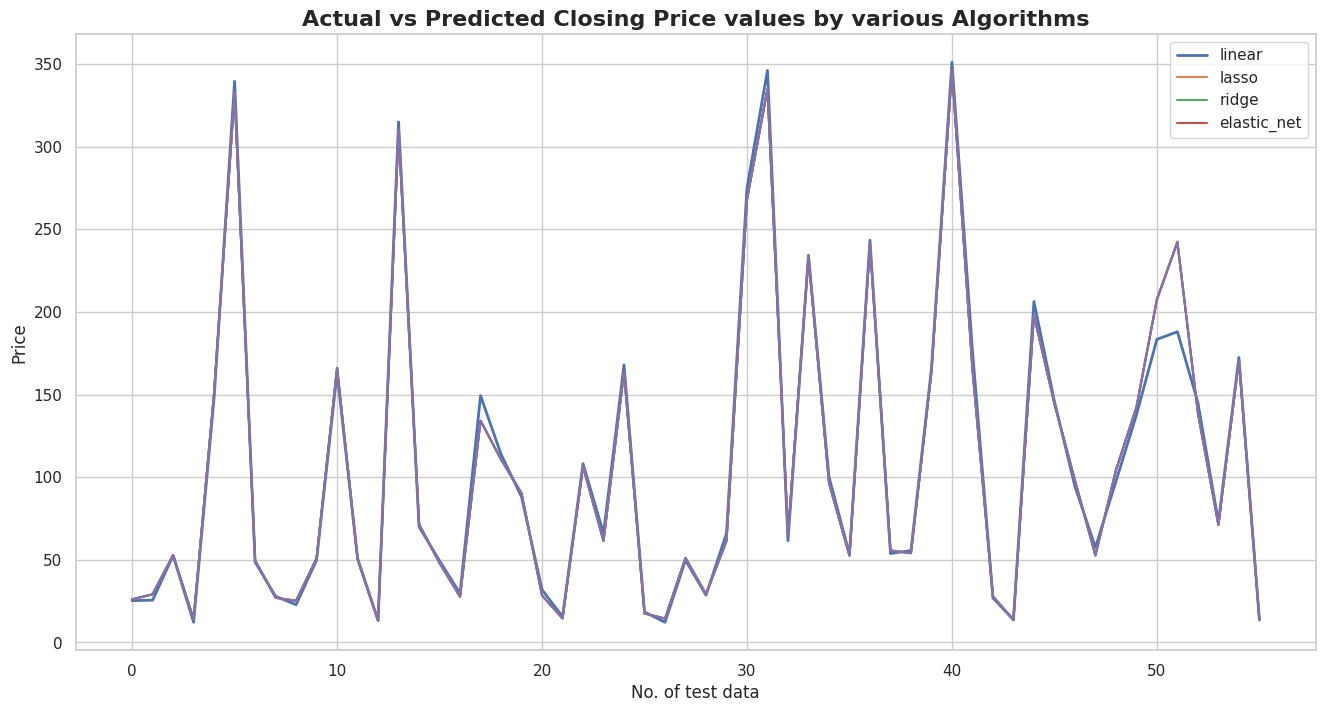

In [68]:
# Plotting the predicted values of all the models against the true values.
plt.figure(figsize=(16,8))
plt.plot(10**y_test, linewidth=2)
plt.plot(10**y_pred_linear)
plt.plot(10**y_pred_lasso)
plt.plot(10**y_pred_ridge)
plt.plot(10**y_pred_elastic_net)
plt.legend(['linear','lasso','ridge','elastic_net'])
plt.xlabel("No. of test data")
plt.ylabel("Price")
plt.title('Actual vs Predicted Closing Price values by various Algorithms', weight = 'bold',fontsize=16)
plt.show()

# finding the best score for the optimal parameter.
elasticnet_regressor.best_score_

In [69]:
elasticnet_regressor.best_score_

-0.0010906628821462008

# **Conclusion**

* By utilizing data visualization on our target variable, we can clearly observe the substantial impact of the 2018 fraud case involving Rana Kapoor, as evidenced by a significant drop in stock prices during that period.

* Upon loading the dataset, we discovered that it is free from null values and duplicate entries, ensuring data integrity.

* While some outliers are present in our features, given the modest size of the dataset, removing these instances would result in valuable information loss.

* We noted that the distribution of all variables displays positive skewness. To address this, we applied log transformations to the variables.

* A noticeable correlation exists between the dependent and independent variables. This suggests that our dependent variable significantly relies on our features and can be accurately predicted using them.

* A relatively high correlation was observed among our independent variables. Although this multicollinearity is inevitable due to the small dataset size, it's worth noting.

* We implemented various models on our dataset to predict closing prices. Interestingly, all models demonstrated remarkable performance. Among them, the Elastic Net regressor emerged as the top performer, boasting an Adjusted R-squared score of 0.9932 and excelling in all evaluation metrics.

* All deployed models exhibited impressive results on our data, yielding an Adjusted R-squared exceeding 99%.

* With our model achieving such precise predictions, we can confidently deploy it for further predictive tasks involving future data

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***